In [10]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to be 3-dimensional for RNN input
x_train = x_train.reshape((-1, 28, 28))
x_test = x_test.reshape((-1, 28, 28))

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [11]:
# Construct the RNN model
model = keras.Sequential([
    keras.layers.LSTM(128, input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 20s 41ms/step - loss: 0.5127 - accuracy: 0.8323 - val_loss: 0.1686 - val_accuracy: 0.9465
Epoch 2/10
469/469 [==============================] - 18s 37ms/step - loss: 0.1409 - accuracy: 0.9572 - val_loss: 0.1218 - val_accuracy: 0.9622
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0975 - accuracy: 0.9711 - val_loss: 0.0881 - val_accuracy: 0.9724
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.0755 - val_accuracy: 0.9745
Epoch 5/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0599 - accuracy: 0.9811 - val_loss: 0.0611 - val_accuracy: 0.9816
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0496 - accuracy: 0.9848 - val_loss: 0.0639 - val_accuracy: 0.9805
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0731 - val_accuracy:

In [13]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


313/313 [==============================] - 1s 4ms/step - loss: 0.0519 - accuracy: 0.9848
Test loss: 0.0519
Test accuracy: 0.9848


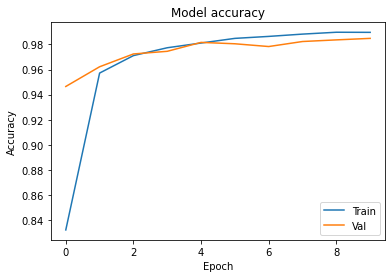

In [14]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
# Compute the confusion matrix and classification report
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

print('Confusion matrix:')
print(confusion_mtx)
print()
print('Classification report:')
print(class_report)


313/313 [==============================] - 1s 3ms/step
Confusion matrix:
[[ 970    0    0    0    0    0    5    1    1    3]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   3    4 1008    3    3    0    0   10    1    0]
 [   0    0    4 1000    0    2    0    3    1    0]
 [   1    0    0    0  970    1    2    2    0    6]
 [   3    0    0   12    0  869    3    1    3    1]
 [   1    4    0    0    3    3  946    0    1    0]
 [   0    3    2    1    1    0    0 1018    0    3]
 [   2    0    2    3    3    4    1    4  951    4]
 [   0    0    0    2   13    2    1    8    1  982]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.97      0.98    